# The Princess Challenge (Part 2)

## Boosting Performance with vectorized NumPy code


In [70]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
%matplotlib inline 

## 1. Getting startet...one simulation

In [71]:
size_applicants = 100
size_testgroup = 50

In [72]:
np.arange(1, size_applicants+1)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [73]:
applicants_sorted = np.arange(1, size_applicants+1)

In [74]:
applicants_sorted

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [75]:
np.random.seed(123)
np.random.shuffle(applicants_sorted)

In [76]:
applicants_unsorted = applicants_sorted[:]

In [77]:
applicants_unsorted

array([  9,  71,  83,  29,  64,   1,   6,  51,  82,   5,  24,  66,  77,
        61,  25,  43,  78,  39,  57,  76,  36,  89,  20,  30,  32,  92,
        86,  10,  54,  42,  22,  91,  34,  70,  85,  88,  96,  98,  63,
        13,  21,  90,  38,  60,   2,  75,  12,  80,  15,  55,  17,  27,
        52,  46,   7,  99,  31,  45,  73,  44,  16,  95,  19,  14,  23,
        11,  59,  72,  65,   4,  41,  35,  28,  53,   8,  49,  62,  94,
       100,  40,   3,  68,  56,  50,  69,  81,  37,  79,  97,  26,  47,
        33,  74,  48,  87,  58,  84,  18,  93,  67])

In [78]:
testgroup = applicants_unsorted[:size_testgroup]

In [79]:
testgroup

array([ 9, 71, 83, 29, 64,  1,  6, 51, 82,  5, 24, 66, 77, 61, 25, 43, 78,
       39, 57, 76, 36, 89, 20, 30, 32, 92, 86, 10, 54, 42, 22, 91, 34, 70,
       85, 88, 96, 98, 63, 13, 21, 90, 38, 60,  2, 75, 12, 80, 15, 55])

In [80]:
len(testgroup)

50

In [81]:
testgroup.sort()

In [82]:
testgroup

array([ 1,  2,  5,  6,  9, 10, 12, 13, 15, 20, 21, 22, 24, 25, 29, 30, 32,
       34, 36, 38, 39, 42, 43, 51, 54, 55, 57, 60, 61, 63, 64, 66, 70, 71,
       75, 76, 77, 78, 80, 82, 83, 85, 86, 88, 89, 90, 91, 92, 96, 98])

In [83]:
n_best = 1

In [84]:
testgroup_best = testgroup[-n_best]

In [85]:
testgroup_best

98

In [86]:
selectgroup = applicants_unsorted[size_testgroup:]

In [87]:
selectgroup

array([ 17,  27,  52,  46,   7,  99,  31,  45,  73,  44,  16,  95,  19,
        14,  23,  11,  59,  72,  65,   4,  41,  35,  28,  53,   8,  49,
        62,  94, 100,  40,   3,  68,  56,  50,  69,  81,  37,  79,  97,
        26,  47,  33,  74,  48,  87,  58,  84,  18,  93,  67])

In [88]:
len(selectgroup)

50

In [89]:
selectgroup > testgroup_best

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [159]:
np.append(selectgroup[selectgroup > testgroup_best], 0)

array([ 99, 100,   0])

In [160]:
selection = selectgroup[selectgroup > testgroup_best][0]
selection

99

In [92]:
selection = np.append(selectgroup[selectgroup > testgroup_best], 0)[0]
selection

99

In [162]:
size_applicants = 100
size_testgroup = 50
n_best = 1

In [163]:
applicants_sorted = np.arange(1, size_applicants+1)

np.random.seed(123)
np.random.shuffle(applicants_sorted)

applicants_unsorted = applicants_sorted[:]
testgroup = applicants_unsorted[:size_testgroup]
testgroup.sort()
testgroup_best = testgroup[-n_best]
selectgroup = applicants_unsorted[size_testgroup:]

selection = np.append(selectgroup[selectgroup > testgroup_best], 0)[0]

print(selection)


99


## 2. Getting  probabilistic...with many simulations

In [164]:
import numpy as np

### Toy Example

In [165]:
size_applicants = 10
size_testgroup = 5
n_best = 1
sims = 10

In [166]:
np.arange(1, size_applicants+1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [167]:
m  = np.resize(np.arange(1, size_applicants+1), (sims, size_applicants))
m

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])

In [168]:
np.random.seed(123)
for i in range(sims):
    np.random.shuffle(m[i])

In [169]:
m

array([[ 5,  1,  8,  6,  9,  4,  2,  7, 10,  3],
       [ 4,  6,  5,  3,  9,  8,  7, 10,  1,  2],
       [ 3,  2,  9,  8,  1,  5,  6,  7,  4, 10],
       [ 6,  2,  1,  9,  7, 10,  5,  3,  4,  8],
       [ 7,  9,  3, 10,  6,  5,  4,  2,  8,  1],
       [10,  5,  8,  1,  2,  3,  4,  9,  7,  6],
       [ 8,  9,  2,  5, 10,  7,  3,  4,  1,  6],
       [ 2,  8,  9,  1,  3,  4,  6,  7, 10,  5],
       [ 1, 10,  6,  3,  9,  2,  7,  4,  8,  5],
       [ 7,  4,  6,  9,  8,  2,  1,  5,  3, 10]])

In [170]:
test_matrix =  m[:,:size_testgroup]

In [171]:
test_matrix

array([[ 5,  1,  8,  6,  9],
       [ 4,  6,  5,  3,  9],
       [ 3,  2,  9,  8,  1],
       [ 6,  2,  1,  9,  7],
       [ 7,  9,  3, 10,  6],
       [10,  5,  8,  1,  2],
       [ 8,  9,  2,  5, 10],
       [ 2,  8,  9,  1,  3],
       [ 1, 10,  6,  3,  9],
       [ 7,  4,  6,  9,  8]])

In [172]:
test_matrix.sort()

In [173]:
test_matrix

array([[ 1,  5,  6,  8,  9],
       [ 3,  4,  5,  6,  9],
       [ 1,  2,  3,  8,  9],
       [ 1,  2,  6,  7,  9],
       [ 3,  6,  7,  9, 10],
       [ 1,  2,  5,  8, 10],
       [ 2,  5,  8,  9, 10],
       [ 1,  2,  3,  8,  9],
       [ 1,  3,  6,  9, 10],
       [ 4,  6,  7,  8,  9]])

In [174]:
test_matrix_best = test_matrix[:,-n_best]

In [175]:
test_matrix_best

array([ 9,  9,  9,  9, 10, 10, 10,  9, 10,  9])

In [176]:
select_matrix = m[:,size_testgroup:]

In [177]:
select_matrix

array([[ 4,  2,  7, 10,  3],
       [ 8,  7, 10,  1,  2],
       [ 5,  6,  7,  4, 10],
       [10,  5,  3,  4,  8],
       [ 5,  4,  2,  8,  1],
       [ 3,  4,  9,  7,  6],
       [ 7,  3,  4,  1,  6],
       [ 4,  6,  7, 10,  5],
       [ 2,  7,  4,  8,  5],
       [ 2,  1,  5,  3, 10]])

In [185]:
select_matrix[0][select_matrix[0] > test_matrix_best[0]]

array([10])

In [191]:
for i in range(sims):
    print(np.append(select_matrix[i][select_matrix[i] > test_matrix_best[i]], 0)[0])

10
10
10
10
0
0
0
10
0
10


In [192]:
results = np.empty(sims)
for i in range(sims):
    results[i] = np.append(select_matrix[i][select_matrix[i] > test_matrix_best[i]], 0)[0]

In [193]:
results

array([10., 10., 10., 10.,  0.,  0.,  0., 10.,  0., 10.])

In [194]:
size_applicants = 10
size_testgroup = 5
n_best = 1
sims = 10

In [195]:
m  = np.resize(np.arange(1, size_applicants+1), (sims, size_applicants))

np.random.seed(123)
for i in range(sims):
    np.random.shuffle(m[i])

test_matrix =  m[:,:size_testgroup]
test_matrix.sort()
test_matrix_best = test_matrix[:,-n_best]
select_matrix = m[:,size_testgroup:]

results = np.empty(sims)
for i in range(sims):
    results[i] = np.append(select_matrix[i][select_matrix[i] > test_matrix_best[i]], 0)[0]

print(results)

[10. 10. 10. 10.  0.  0.  0. 10.  0. 10.]


### Princess Challenge

In [196]:
size_applicants = 100
size_testgroup = 50
n_best = 1
sims = 1000

In [197]:
m  = np.resize(np.arange(1, size_applicants+1), (sims, size_applicants))

np.random.seed(123)
for i in range(sims):
    np.random.shuffle(m[i])

test_matrix =  m[:,:size_testgroup]
test_matrix.sort()
test_matrix_best = test_matrix[:,-n_best]
select_matrix = m[:,size_testgroup:]

results = np.empty(sims)
for i in range(sims):
    results[i] = np.append(select_matrix[i][select_matrix[i] > test_matrix_best[i]], 0)[0]

print(results)

[ 99.   0.   0.  99. 100. 100.   0.   0.   0. 100.   0. 100.  97. 100.
   0.   0.   0. 100.  98. 100.  99.  99.   0. 100.   0. 100.   0. 100.
   0.   0. 100. 100.   0.  99.   0. 100.  99.  99. 100. 100.   0.   0.
 100.   0. 100. 100.   0.   0.  97. 100.  99. 100.   0. 100.   0.   0.
   0.   0.  99.   0. 100.  99. 100. 100. 100.  99. 100.   0.   0. 100.
 100. 100.   0. 100. 100.   0.   0. 100.   0.   0.   0. 100. 100. 100.
  96.   0.  98.   0. 100.  99. 100.  99. 100.   0.   0.   0.   0.   0.
 100.   0. 100.   0. 100.   0. 100.   0.  99.   0.   0.   0.  99.   0.
 100. 100.  99.  99. 100.  99.   0.   0. 100.   0.   0.   0.   0.  99.
 100. 100.   0.   0. 100.   0.  99.   0.   0. 100.   0.   0.   0.   0.
   0. 100.  97. 100.   0. 100.   0.   0.   0. 100.  98.   0. 100.   0.
   0. 100.   0. 100.   0.   0.  99. 100. 100.   0.   0.   0. 100.   0.
 100. 100.   0.  97. 100. 100. 100. 100.   0.   0. 100. 100. 100.  99.
 100. 100.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0. 100.
   0. 

## 3. Analyzing results and calculating statistics

In [117]:
#Min
Min = results.min()
Min

0.0

In [118]:
#Max
Max = results.max()
Max

100.0

In [119]:
#Mean
Mean = results.mean()
Mean

50.364

In [120]:
#Count
Count = results[results == size_applicants].size
Count

359

In [121]:
#prob_best
prob_best = Count/sims
prob_best

0.359

### Visualization

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

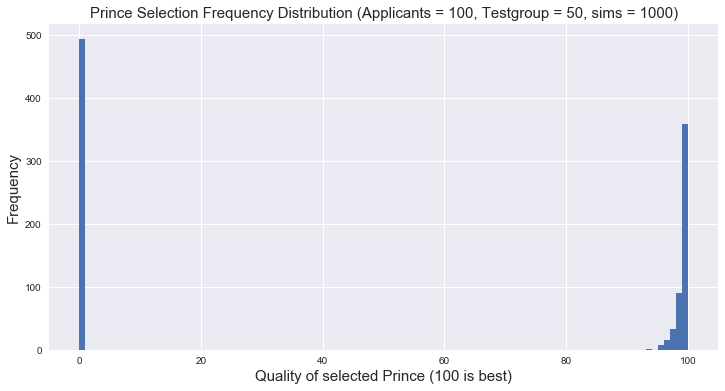

In [123]:
plt.figure(figsize = (12,6))
plt.hist(results, bins = int(Max-Min+1))
plt.xlabel("Quality of selected Prince (100 is best)", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Prince Selection Frequency Distribution (Applicants = 100, Testgroup = 50, sims = 1000)", fontsize = 15)
plt.show()

## 4. Automation by writing a Function

### Python Standard Library Solution

In [124]:
import random

In [125]:
def Princess(size_applicants = 100, size_testgroup = 50, sims = 1000, seed = 114, metric = "results", n_best = 1):
    
    results =[]
    random.seed(seed)
    for _ in range(sims):

        applicants_sorted = list(range(1, size_applicants+1))
        applicants_unsorted = random.sample(applicants_sorted, size_applicants)
        testgroup = applicants_unsorted[:size_testgroup]
        testgroup_nbest = sorted(testgroup, reverse = True)[n_best-1]
        selectgroup = applicants_unsorted[size_testgroup:]

        selection = 0
        for i in selectgroup:
            if i > testgroup_nbest:
                selection = i 
                break
            else:
                pass
            
        results.append(selection)  
    prob_best = results.count(size_applicants)/sims
    average = sum(results)/sims
    
    if metric == "results":
        return results
    elif metric == "prob_best":
        return prob_best
    elif metric == "average":
        return average

### NumPy

In [126]:
def Princess_NP(size_applicants = 100, size_testgroup = 50, sims = 1000, seed = 123, metric = "results", n_best = 1):
    
    m  = np.resize(np.arange(1, size_applicants+1), (sims, size_applicants))

    np.random.seed(seed)
    for i in range(sims):
        np.random.shuffle(m[i])

    test_matrix =  m[:,:size_testgroup]
    test_matrix.sort()
    test_matrix_best = test_matrix[:,-n_best]
    select_matrix = m[:,size_testgroup:]

    results = np.empty(sims)
    for i in range(sims):
        results[i] = np.append(select_matrix[i][select_matrix[i] > test_matrix_best[i]], 0)[0]
    

    prob_best = results[results == size_applicants].size/sims
    average = results.mean()
    
    if metric == "results":
        return results
    elif metric == "prob_best":
        return prob_best
    elif metric == "average":
        return average

In [127]:
Princess_NP(metric = "prob_best")

0.359

## 5. Speed Comparison

### Python Standard Library

In [128]:
Princess(sims = 100000, metric = "prob_best")

0.34932

In [129]:
%timeit Princess(size_applicants=1000, sims = 10000, metric = "prob_best", size_testgroup = 500)

10.2 s ± 639 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Numpy

In [130]:
Princess_NP(sims = 100000, metric= "prob_best")

0.35034

In [131]:
%timeit Princess_NP(size_applicants = 1000, sims = 10000, metric = "prob_best", size_testgroup = 500)

958 ms ± 42.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## 6. Optimizing Strategies  for n_best = 1

### Maximizing probability to find Prince Charming

#### 100 Applicants

In [198]:
results_10000sims = []
for size in range(1,101):
    results_10000sims.append(Princess_NP(size_testgroup=size, metric = "prob_best", sims = 10000))
results_10000sims

[0.0508,
 0.0838,
 0.1119,
 0.1338,
 0.1549,
 0.1744,
 0.1877,
 0.2035,
 0.2145,
 0.2296,
 0.2429,
 0.2565,
 0.2654,
 0.2738,
 0.2841,
 0.2939,
 0.3014,
 0.3064,
 0.3109,
 0.3174,
 0.3228,
 0.3278,
 0.3312,
 0.3353,
 0.34,
 0.343,
 0.3481,
 0.3502,
 0.3523,
 0.354,
 0.3574,
 0.3588,
 0.3624,
 0.3658,
 0.367,
 0.3646,
 0.3648,
 0.3645,
 0.3642,
 0.3608,
 0.3588,
 0.3555,
 0.3565,
 0.3571,
 0.3542,
 0.3526,
 0.3532,
 0.3523,
 0.35,
 0.3474,
 0.3436,
 0.3406,
 0.3376,
 0.3315,
 0.3277,
 0.3237,
 0.3202,
 0.3163,
 0.3116,
 0.3087,
 0.304,
 0.2986,
 0.2951,
 0.2902,
 0.2857,
 0.2782,
 0.2734,
 0.2682,
 0.2627,
 0.2574,
 0.2505,
 0.243,
 0.2357,
 0.2296,
 0.2226,
 0.2155,
 0.2071,
 0.1984,
 0.1911,
 0.1842,
 0.1738,
 0.1645,
 0.1561,
 0.1489,
 0.1411,
 0.1333,
 0.1241,
 0.1161,
 0.1062,
 0.0978,
 0.0877,
 0.0789,
 0.0696,
 0.0583,
 0.0488,
 0.0376,
 0.0283,
 0.0191,
 0.0096,
 0.0]

In [204]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn")

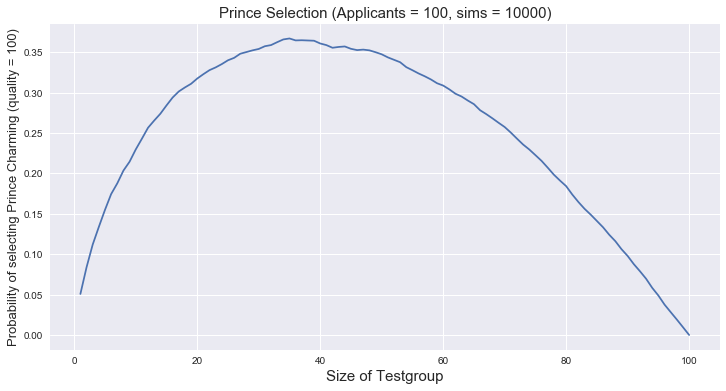

In [205]:
plt.figure (figsize = (12,6))
plt.plot(range(1, 101), results_10000sims)
plt.xlabel("Size of Testgroup", fontsize = 15)
plt.ylabel("Probability of selecting Prince Charming (quality = 100)", fontsize = 13)
plt.title("Prince Selection (Applicants = 100, sims = 10000)", fontsize = 15)
plt.show()

#### 1000 Applicants

In [206]:
results_50000sims = []
for size in range(350,401):
    results_50000sims.append(Princess_NP(sims = 50000, size_applicants=1000, size_testgroup=size, metric = "prob_best"))

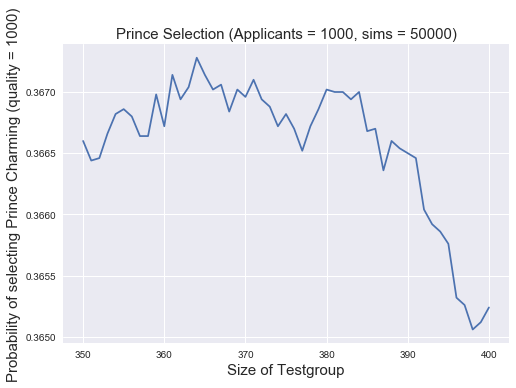

In [207]:
plt.plot(range(350,401), results_50000sims)
plt.xlabel("Size of Testgroup", fontsize = 15)
plt.ylabel("Probability of selecting Prince Charming (quality = 1000)", fontsize = 15)
plt.title("Prince Selection (Applicants = 1000, sims = 50000)", fontsize = 15)
plt.show()

In [208]:
max_prob= round(max(results_50000sims),3)
max_prob

0.367

In [209]:
np.array(results_50000sims).argmax()

14

In [210]:
testgroup_opt_size = (350+np.array(results_50000sims).argmax())/1000
testgroup_opt_size

0.364

In [211]:
print("""The optimal testgroup size is {} % in order have
the maximum probability of {} % to select the best candidate!""".format(testgroup_opt_size*100, max_prob*100))

The optimal testgroup size is 36.4 % in order have
the maximum probability of 36.7 % to select the best candidate!


#### Mathematical Solution: the 1/e law of best choice 

In [212]:
one_div_e = round(1/np.exp(1),3)

In [213]:
one_div_e

0.368

In [214]:
print("""The mathematically optimal testgroup size is {} % in order have
the maximum probability of {} % to select the best candidate!""".format(one_div_e*100, one_div_e*100))

The mathematically optimal testgroup size is 36.8 % in order have
the maximum probability of 36.8 % to select the best candidate!


### Maximizing Average Quality

In [215]:
average_10000sims = []
for size in range(1,101):
    average_10000sims.append(Princess_NP(size_testgroup=size, metric = "average", sims = 10000))

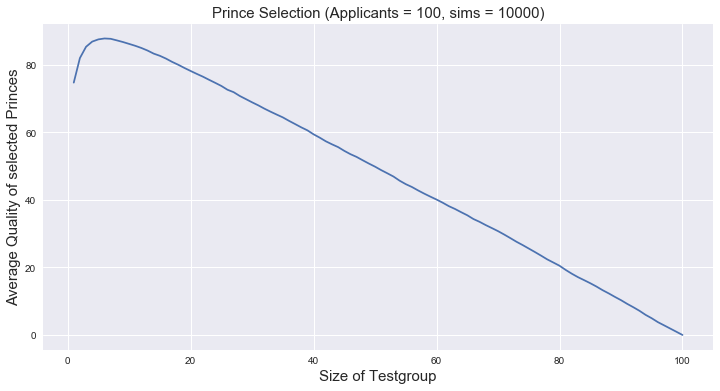

In [216]:
plt.figure (figsize = (12,6))
plt.plot(range(1,101), average_10000sims)
plt.xlabel("Size of Testgroup", fontsize = 15)
plt.ylabel("Average Quality of selected Princes", fontsize = 15)
plt.title("Prince Selection (Applicants = 100, sims = 10000)", fontsize = 15)
plt.show()

In [217]:
average_50000sims = []
for size in range(1,11):
    average_50000sims.append(Princess_NP(size_testgroup=size, metric = "average", sims = 50000))

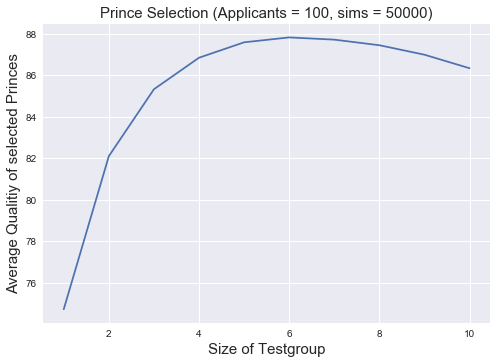

In [218]:
plt.plot(range(1,11), average_50000sims)
plt.xlabel("Size of Testgroup", fontsize = 15)
plt.ylabel("Average Qualitiy of selected Princes", fontsize = 15)
plt.title("Prince Selection (Applicants = 100, sims = 50000)", fontsize = 15)
plt.show()

In [219]:
average_50000sims

[74.72,
 82.10178,
 85.3292,
 86.8507,
 87.5935,
 87.83006,
 87.722,
 87.45266,
 86.9956,
 86.3431]

In [220]:
max_average = round(max(average_50000sims),1)
max_average

87.8

In [221]:
print("""The optimal testgroup size is {} in order have the maximum average/expected quality of {}!""".format(6, max_average))

The optimal testgroup size is 6 in order have the maximum average/expected quality of 87.8!


In [222]:
results = Princess_NP(size_applicants=100, size_testgroup=6, sims = 100000, metric = "results")

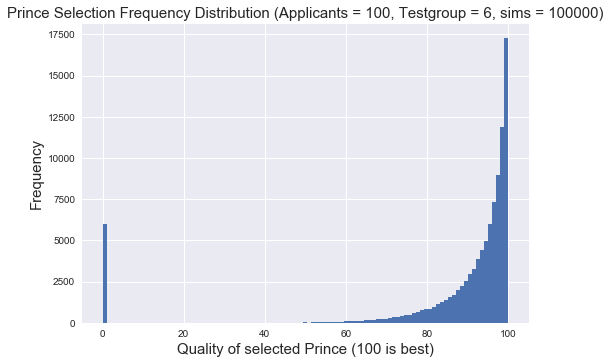

In [223]:
plt.hist(results, bins = 101)
plt.xlabel("Quality of selected Prince (100 is best)", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Prince Selection Frequency Distribution (Applicants = 100, Testgroup = 6, sims = 100000)", fontsize = 15)
plt.show()

## 7. Changing Strategies, n_best = n

### maximizing probability to find Prince Charming

In [224]:
n_best = [1, 2, 3, 5, 10 ,25, 50, 75, 90]

In [225]:
results = []

for best in n_best:
    l = []
    for size in range(best, 101):
        l.append(Princess_NP(size_testgroup=size, n_best=best, metric = "prob_best", sims =10000))
    results.append(l)

In [226]:
results

[[0.0508,
  0.0838,
  0.1119,
  0.1338,
  0.1549,
  0.1744,
  0.1877,
  0.2035,
  0.2145,
  0.2296,
  0.2429,
  0.2565,
  0.2654,
  0.2738,
  0.2841,
  0.2939,
  0.3014,
  0.3064,
  0.3109,
  0.3174,
  0.3228,
  0.3278,
  0.3312,
  0.3353,
  0.34,
  0.343,
  0.3481,
  0.3502,
  0.3523,
  0.354,
  0.3574,
  0.3588,
  0.3624,
  0.3658,
  0.367,
  0.3646,
  0.3648,
  0.3645,
  0.3642,
  0.3608,
  0.3588,
  0.3555,
  0.3565,
  0.3571,
  0.3542,
  0.3526,
  0.3532,
  0.3523,
  0.35,
  0.3474,
  0.3436,
  0.3406,
  0.3376,
  0.3315,
  0.3277,
  0.3237,
  0.3202,
  0.3163,
  0.3116,
  0.3087,
  0.304,
  0.2986,
  0.2951,
  0.2902,
  0.2857,
  0.2782,
  0.2734,
  0.2682,
  0.2627,
  0.2574,
  0.2505,
  0.243,
  0.2357,
  0.2296,
  0.2226,
  0.2155,
  0.2071,
  0.1984,
  0.1911,
  0.1842,
  0.1738,
  0.1645,
  0.1561,
  0.1489,
  0.1411,
  0.1333,
  0.1241,
  0.1161,
  0.1062,
  0.0978,
  0.0877,
  0.0789,
  0.0696,
  0.0583,
  0.0488,
  0.0376,
  0.0283,
  0.0191,
  0.0096,
  0.0],
 [0.0199,
 

In [229]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn")

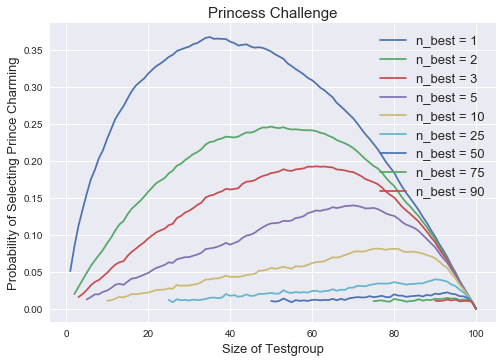

In [230]:
count = 0
for best in n_best:
    plt.plot(range(best, 101), results[count], label = "n_best = {}".format(best))
    count +=1
plt.legend(loc = "upper right", fontsize = 13) 
plt.xlabel("Size of Testgroup", fontsize = 13)
plt.ylabel("Probability of Selecting Prince Charming", fontsize = 13)
plt.title("Princess Challenge", fontsize = 15)
plt.show()

### Maximizing Average Quality

#### 100 Applicants

In [231]:
n_best = [1, 2, 3, 5, 10 ,25, 50, 75, 90]

In [232]:
results = []

for best in n_best:
    l = []
    for size in range(best, 101):
         l.append(Princess_NP(size_testgroup=size, n_best=best, metric = "average", sims = 10000))
    results.append(l)

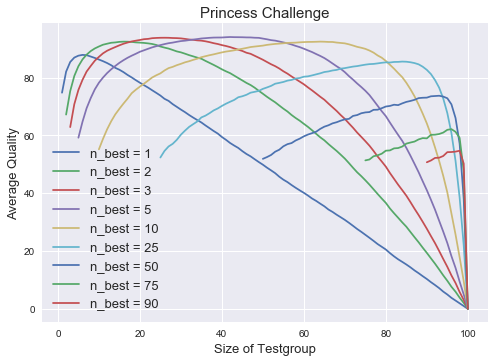

In [233]:
count = 0
for best in n_best:
    plt.plot(range(best, 101), results[count], label = "n_best = {}".format(best))
    count +=1
plt.legend(loc = "lower left", fontsize = 13) 
plt.xlabel("Size of Testgroup", fontsize = 13)
plt.ylabel("Average Quality", fontsize = 13)
plt.title("Princess Challenge", fontsize = 15)
plt.show()

In [234]:
n_best = np.arange(2,11)

In [235]:
test_group_sizes = np.arange(15,71)

In [236]:
combs = []
for best in n_best:
    for size in range(max(best,test_group_sizes[0]) , test_group_sizes[-1]):
        combs.append([best, size])

In [237]:
combs

[[2, 15],
 [2, 16],
 [2, 17],
 [2, 18],
 [2, 19],
 [2, 20],
 [2, 21],
 [2, 22],
 [2, 23],
 [2, 24],
 [2, 25],
 [2, 26],
 [2, 27],
 [2, 28],
 [2, 29],
 [2, 30],
 [2, 31],
 [2, 32],
 [2, 33],
 [2, 34],
 [2, 35],
 [2, 36],
 [2, 37],
 [2, 38],
 [2, 39],
 [2, 40],
 [2, 41],
 [2, 42],
 [2, 43],
 [2, 44],
 [2, 45],
 [2, 46],
 [2, 47],
 [2, 48],
 [2, 49],
 [2, 50],
 [2, 51],
 [2, 52],
 [2, 53],
 [2, 54],
 [2, 55],
 [2, 56],
 [2, 57],
 [2, 58],
 [2, 59],
 [2, 60],
 [2, 61],
 [2, 62],
 [2, 63],
 [2, 64],
 [2, 65],
 [2, 66],
 [2, 67],
 [2, 68],
 [2, 69],
 [3, 15],
 [3, 16],
 [3, 17],
 [3, 18],
 [3, 19],
 [3, 20],
 [3, 21],
 [3, 22],
 [3, 23],
 [3, 24],
 [3, 25],
 [3, 26],
 [3, 27],
 [3, 28],
 [3, 29],
 [3, 30],
 [3, 31],
 [3, 32],
 [3, 33],
 [3, 34],
 [3, 35],
 [3, 36],
 [3, 37],
 [3, 38],
 [3, 39],
 [3, 40],
 [3, 41],
 [3, 42],
 [3, 43],
 [3, 44],
 [3, 45],
 [3, 46],
 [3, 47],
 [3, 48],
 [3, 49],
 [3, 50],
 [3, 51],
 [3, 52],
 [3, 53],
 [3, 54],
 [3, 55],
 [3, 56],
 [3, 57],
 [3, 58],
 [3, 59],


In [238]:
no_combs = len(np.array(combs))
no_combs

495

In [239]:
results=[]
for comb in combs: 
    results.append(Princess_NP(size_testgroup= comb[1], n_best= comb[0], metric = "average", sims = 25000))

In [240]:
results

[92.47576,
 92.499,
 92.45796,
 92.45208,
 92.35736,
 92.17916,
 92.06752,
 91.86864,
 91.64008,
 91.32304,
 90.92732,
 90.53756,
 90.11892,
 89.68908,
 89.16312,
 88.73748,
 88.21148,
 87.6888,
 87.20136,
 86.68672,
 86.23096,
 85.53848,
 84.95676,
 84.29512,
 83.51404,
 82.75036,
 81.96416,
 81.24316,
 80.4414,
 79.54192,
 78.67368,
 77.8304,
 77.0086,
 76.11524,
 75.08872,
 74.17112,
 73.12356,
 72.04904,
 71.08716,
 69.98888,
 68.93064,
 67.9126,
 66.8528,
 65.78196,
 64.69848,
 63.57112,
 62.45804,
 61.27896,
 60.00628,
 58.81244,
 57.65896,
 56.40564,
 55.12296,
 53.8704,
 52.52456,
 91.20404,
 91.69048,
 92.08416,
 92.46368,
 92.77664,
 93.02712,
 93.29708,
 93.42648,
 93.57924,
 93.7012,
 93.75564,
 93.79416,
 93.7566,
 93.70668,
 93.65892,
 93.5764,
 93.39684,
 93.2064,
 93.044,
 92.89104,
 92.72184,
 92.4454,
 92.20932,
 91.88124,
 91.53124,
 91.19316,
 90.85264,
 90.45384,
 89.9776,
 89.49964,
 89.03244,
 88.54132,
 88.05456,
 87.42172,
 86.69012,
 86.03368,
 85.26844,
 84.4

In [241]:
len(results)

495

In [242]:
n_best_size_average = np.hstack((np.array(combs),np.array(results).reshape(no_combs,1)))

In [243]:
n_best_size_average

array([[ 2.     , 15.     , 92.47576],
       [ 2.     , 16.     , 92.499  ],
       [ 2.     , 17.     , 92.45796],
       ...,
       [10.     , 67.     , 92.22292],
       [10.     , 68.     , 92.09392],
       [10.     , 69.     , 91.89496]])

[]

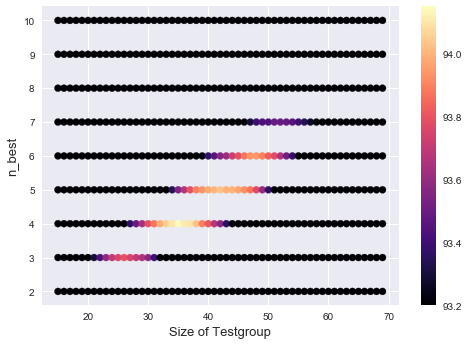

In [244]:
plt.scatter(n_best_size_average[:,1], n_best_size_average[:,0], c = n_best_size_average[:,2],
            cmap = "magma", vmin= 93.2, vmax = 94.15)
plt.colorbar()
plt.xlabel("Size of Testgroup", fontsize = 13)
plt.ylabel("n_best", fontsize = 13)
plt.plot()

In [245]:
n_best_size_average[:,2].max()

94.1432

In [246]:
n_best_size_average[:,2].argmax()

130

In [247]:
top = n_best_size_average[n_best_size_average[:,2].argmax(),:]
top

array([ 4.    , 35.    , 94.1432])

In [248]:
results = Princess_NP(size_testgroup=35, n_best = 4, sims = 100000, metric = "results")

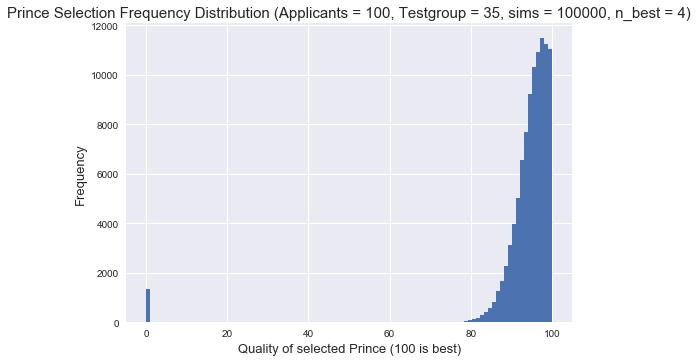

In [249]:
plt.hist(results, bins = 101)
plt.xlabel("Quality of selected Prince (100 is best)", fontsize = 13)
plt.ylabel("Frequency", fontsize = 13)
plt.title("Prince Selection Frequency Distribution (Applicants = 100, Testgroup = 35, sims = 100000, n_best = 4)", fontsize = 15)
plt.show()

In [250]:
list(results).count(0)/100000

0.01337

In [251]:
np.percentile(np.array(results), [2.5, 97.5])

array([ 84., 100.])